In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-dark')
plt.rcParams.update({'font.size': 16})
from ipywidgets import interact, IntSlider, FloatSlider

In [2]:
def chebyshev_polynomial(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
def interactive_plot(order, x_range):
    x = np.linspace(0, x_range, 1000)
    y = chebyshev_polynomial(order, x)**2
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"n={order}", linewidth=2, color=colors[order-1])
    plt.ylim(0, max(y) + 0.1)
    plt.title(rf'$C_{order}^2(x)$')
    plt.grid(True)
    plt.show()

interact(interactive_plot, 
         order=IntSlider(min=1, max=9, step=1, value=3), 
         x_range=FloatSlider(min=1, max=1.5, step=0.001, value=1))

interactive(children=(IntSlider(value=3, description='order', max=9, min=1), FloatSlider(value=1.0, descriptio…

<function __main__.interactive_plot(order, x_range)>

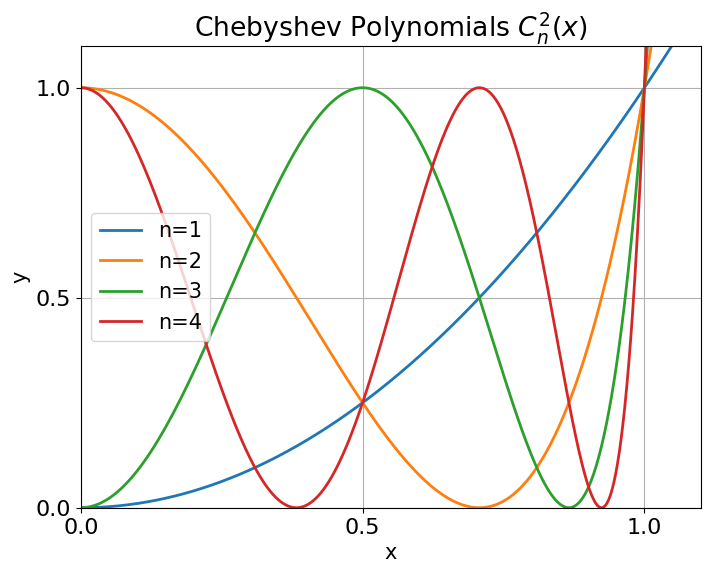

In [3]:
x = np.linspace(0, 1.1, 1000)
plt.figure(figsize=(8, 6))

for order in range(1,5):
    y = chebyshev_polynomial(order, x)**2
    plt.plot(x, y, label=f"n={order}", linewidth=2)

plt.ylim(-0.0, 1.1)
plt.xlim(-0.0, 1.1)
plt.title(r'Chebyshev Polynomials $C^2_n(x)$')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(np.arange(0., 1.1, step=0.5))
plt.yticks(np.arange(0., 1.1, step=0.5))
plt.grid(which='major')
plt.show()

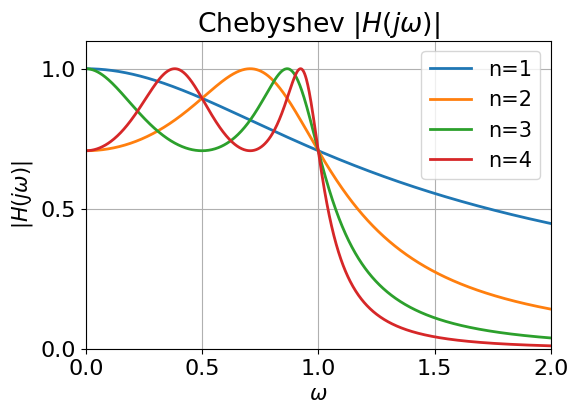

In [4]:
x = np.linspace(0, 2.0, 1000)
plt.figure(figsize=(6, 4))

for order in range(1,5):
    y = 1/np.sqrt(1+chebyshev_polynomial(order, x)**2)
    plt.plot(x, y, label=f"n={order}", linewidth=2)

plt.ylim(-0.0, 1.1)
plt.xlim(-0.0, 2.0)
plt.title(r'Chebyshev $|H(j\omega)|$')
plt.xlabel(r'$\omega$', fontsize=15)
plt.ylabel(r'$|H(j\omega)|$', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(np.arange(0., 2.1, step=0.5))
plt.yticks(np.arange(0., 1.1, step=0.5))
plt.grid(which='major')
plt.show()

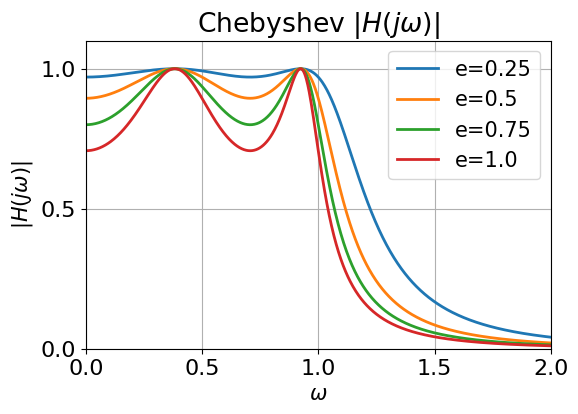

In [5]:
x = np.linspace(0, 2.0, 1000)
plt.figure(figsize=(6, 4))

for e in [0.25, 0.5, 0.75, 1.0]:
    y = 1/np.sqrt(1+e**2*chebyshev_polynomial(4, x)**2)
    plt.plot(x, y, label=f"e={e}", linewidth=2)

plt.ylim(-0.0, 1.1)
plt.xlim(-0.0, 2.0)
plt.title(r'Chebyshev $|H(j\omega)|$')
plt.xlabel(r'$\omega$', fontsize=15)
plt.ylabel(r'$|H(j\omega)|$', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(np.arange(0., 2.1, step=0.5))
plt.yticks(np.arange(0., 1.1, step=0.5))
plt.grid(which='major')
plt.show()

In [6]:
def rev_bessel_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x + 1
    else:
        return (2 * n - 1) * rev_bessel_polynomial(n - 1, x) + x**2 * rev_bessel_polynomial(n - 2, x)
    
bessel_filter = lambda s, n: rev_bessel_polynomial(n, np.zeros_like(s)) / rev_bessel_polynomial(n, s)
    
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
def interactive_plot(order):
    x = np.linspace(0, 5., 1000)
    y = bessel_filter(x, order)
    exp = np.exp(-x)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"n={order}", linewidth=2, color=colors[order-1])
    plt.plot(x, exp, label=r'$e^{-s}$', linewidth=2, color='black', linestyle='dashed')
    plt.ylim(0, max(y) + 0.1)
    plt.title(rf'Bessel Filter $H_n(s)$')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(interactive_plot, 
         order=IntSlider(min=1, max=9, step=1, value=1))

interactive(children=(IntSlider(value=1, description='order', max=9, min=1), Output()), _dom_classes=('widget-…

<function __main__.interactive_plot(order)>

In [7]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
def interactive_plot(order):
    x = np.linspace(1e-3, 1e2, 1000)
    y = bessel_filter(1j*x, order)
    mag = 20 * np.log10(np.abs(y))
    plt.figure(figsize=(10, 6))
    plt.semilogx(x, mag, label=f"n={order}", linewidth=2, color=colors[order-1])
    plt.title(rf'Bessel Filter $|H_{order}(j\omega)|$')
    plt.xlim(1e-3, 1e2)
    plt.ylim(-60, 1)
    plt.ylabel('Magnitude [dB]', fontsize=15)
    plt.xlabel('Frequency [rad/s]', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.show()

interact(interactive_plot, 
         order=IntSlider(min=1, max=9, step=1, value=1))

interactive(children=(IntSlider(value=1, description='order', max=9, min=1), Output()), _dom_classes=('widget-…

<function __main__.interactive_plot(order)>